In [41]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram
 
#function for finding secret number in conventional way of computing
def findSecretNumber(secretNumber):
    #counter for tracking number of attempts and get length of the string
    attempts = 0 
    stringLength = len(secretNumber)
    #loop that iterates through all possible binary combinations of stringl length
    for i in range(2**stringLength):
        #create binary string based on loop
        binaryStr = bin(i)[2:].zfill(stringLength)
        #check if secret string matches current binary string, if so print the binary string and generation attempts
        if secretFunction(binaryStr, secretNumber) == 1:
            print("Conventional Computer Code: {'" + binaryStr + "' : " + str(attempts) + "}")
            break
        #if the secret string does not match, add an attempt
        else:
            attempts += 1
    return None

#function for comparing the generated and secret string, returns 1 if they are the same
def secretFunction(binaryStr, secretBinary):
       return 1 if binaryStr == secretBinary else 0

#funciton for finding secret number in quantum method 
def quantumFindSecretNumber(secretNumber):
    #create quantum circuit based on given length of secretNumber, + 1 auxiliary qubit
    #len(secretNumber) for classical bits to store measurement results
    circuit = QuantumCircuit(len(secretNumber)+1,len(secretNumber))
    
    #prepare qubits
    
    #hadamard gates using range of length of the secret number to create superpostions all binary states
    circuit.h(range(len(secretNumber)))
    #x gate at qubit at the postion of len(secretNumber), prepraes auxilary qubit in state |1>
    circuit.x(len(secretNumber))
    #hadamard gate to auxilary qubit at postion len(secretNumber)
    circuit.h(len(secretNumber))
    
    circuit.barrier()
    #for loop for iterating over each bit based on the reversed string of the binary number
    for i, bit in enumerate(reversed(secretNumber)):
        #check if current bit is 1, if so entangle corresponding qubit with auxiliary qubit
        if bit == '1':
            #controlled x gate, from index of qubit i to last qubit represented by the length of the secret number
            #entangles qubit where corresponding bit in reversed binary representation is 1
            circuit.cx(i, len(secretNumber))

    circuit.barrier()
    #final hadamard gates from qubits in range 0 to len(secretNumber) for measurements
    circuit.h(range(len(secretNumber)))
    circuit.barrier()
    
    #measure the qubits in range of 0 to len(secretNumber), store results in correspondeing classical bits
    circuit.measure(range(len(secretNumber)),range(len(secretNumber)))
    
    #use qiskit IBM simulator to execute quantum circuit, using "ibmq_qasm_simulator"
    simulator = Aer.get_backend('qasm_simulator')
    #retrieve and print results (guessed secret string and attempts) by executing quantum circuit on qasm_simulator
    result = execute(circuit, backend = simulator, shots = 1).result()
    counts = result.get_counts()
    print("Quantum Computing Code: " + str(counts))
    

In [42]:
def main(): 
    secretNumber2 = input("Enter the secret binary number: ")
    print("Format: {BINARY_NUMBER, ATTEMPTS}")
    findSecretNumber(secretNumber2)
    quantumFindSecretNumber(secretNumber2)

In [43]:
main()

Enter the secret binary number: 1101101
Format: {BINARY_NUMBER, ATTEMPTS}
Conventional Computer Code: {'1101101' : 109}
Quantum Computing Code: {'1101101': 1}


In [44]:
#get secretNumber user input, for testing 
secretNumber = input("Enter the secret binary number: ")

Enter the secret binary number: 10100


In [45]:
#code identical to quantumFindSecretNumber function, for visualizing circuit
circuit = QuantumCircuit(len(secretNumber)+1,len(secretNumber))
circuit.h(range(len(secretNumber)))
circuit.x(len(secretNumber))
circuit.h(len(secretNumber))

circuit.barrier()

for i, bit in enumerate(reversed(secretNumber)):
    if bit == '1':
        circuit.cx(i, len(secretNumber))

circuit.barrier()
circuit.h(range(len(secretNumber)))
circuit.barrier()
circuit.measure(range(len(secretNumber)),range(len(secretNumber)))

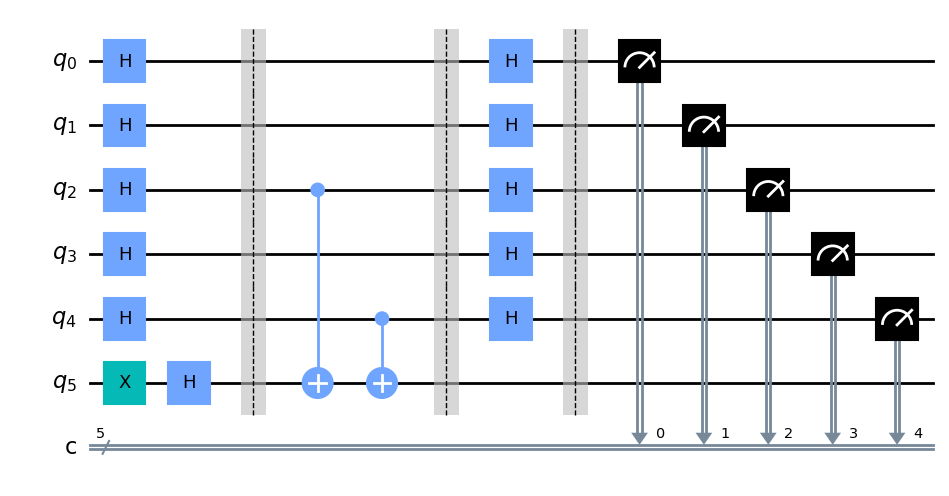

In [46]:
circuit.draw(output='mpl')

In [47]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1).result()
counts = result.get_counts()
print("Format: {BINARY_NUMBER, ATTEMPTS}")

findSecretNumber(secretNumber)
print("Quantum Computing Code: " + str(counts))

Format: {BINARY_NUMBER, ATTEMPTS}
Conventional Computer Code: {'10100' : 20}
Quantum Computing Code: {'10100': 1}
